In [1]:
#HOW IT WORKS

'''

k-Means is clustering used to explore dataset (Unsupervised)

    Once:
    1. k-Means picks k random initial centroids on R^n (space in which data lives)

    Loop:
    2. k-Means assigns each data point to its nearest centroid
    3. k-Means finds new centroids for each cluster using mean of data points



We have feature vectors represting which features and how much of each feature each sample represents
Question: How do we assign labels to each vector given us?

'''

In [12]:
#EXPERIMENT
import tensorflow as tf
import numpy as np


#helper functions

#functions to create centroids with gaussian distributions surrounding them
def create_samples(n_clusters, n_samples_per_cluster, n_features, embiggen_factor, seed):
    np.random.seed(seed)
    slices = []
    centroids = []
    # Create samples for each cluster
    for i in range(n_clusters):
        samples = tf.random_normal((n_samples_per_cluster, n_features),
                               mean=0.0, stddev=5.0, dtype=tf.float32, seed=seed, name="cluster_{}".format(i))
        current_centroid = (np.random.random((1, n_features)) * embiggen_factor) - (embiggen_factor/2)
        centroids.append(current_centroid)
        samples += current_centroid
        slices.append(samples)
    # Create a big "samples" dataset
    samples = tf.concat(0, slices, name='samples')
    centroids = tf.concat(0, centroids, name='centroids')
    return centroids, samples


def plot_clusters(all_samples, centroids, n_samples_per_cluster):
    import matplotlib.pyplot as plt
    # Plot out the different clusters
    # Choose a different colour for each cluster
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))
    for i, centroid in enumerate(centroids):
        # Grab just the samples fpr the given cluster and plot them out with a new colour
        samples = all_samples[i*n_samples_per_cluster:(i+1)*n_samples_per_cluster]
        plt.scatter(samples[:,0], samples[:,1], c=colour[i])
        # Also plot centroid
        plt.plot(centroid[0], centroid[1], markersize=35, marker="x", color='k', mew=10)
        plt.plot(centroid[0], centroid[1], markersize=30, marker="x", color='m', mew=5)
    plt.show()

In [5]:
#some constants
n_features = 2
n_clusters = 3
n_samples_per_cluster = 500
seed = 700
embiggen_factor = 70

np.random.seed(700)

centroids, samples = create_samples(n_clusters, n_samples_per_cluster, n_features, 
                                    embiggen_factor, seed)

In [13]:
#generate the samples
model = tf.global_variables_initializer()
with tf.Session() as session:
    sample_values = session.run(samples)
    centroid_values = session.run(centroids)

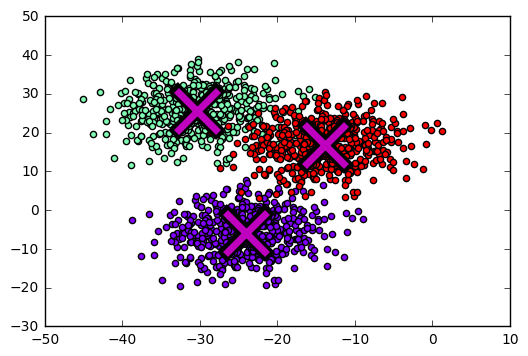

In [18]:
#plotting
plot_clusters(sample_values, centroid_values, n_samples_per_cluster)

In [19]:
################
##### KNN ######
################

In [20]:
# Once:
    # 1. Select random centroids by sampling k samples from dataset X
# Loop (until difference between old and new centroids is below some set threshold):
    # 2. Assign each sample to its nearest centroid
    # 3. Create new centroids by taking mean value of all samples assigned to each centroid

In [21]:
#1: Get random centroids by sampling from distribution

def choose_random_centroids(samples, n_clusters):
    # Step 0: Initialisation: Select `n_clusters` number of random points
    n_samples = tf.shape(samples)[0]
    random_indices = tf.random_shuffle(tf.range(0, n_samples))
    begin = [0,]
    size = [n_clusters,]
    size[0] = n_clusters
    centroid_indices = tf.slice(random_indices, begin, size)
    initial_centroids = tf.gather(samples, centroid_indices)
    return initial_centroids

In [22]:
#2: Assign each sample point to its nearest centroid
    #then step 3

def assign_to_nearest(samples, centroids):
    # Finds the nearest centroid for each sample

    # START from http://esciencegroup.com/2016/01/05/an-encounter-with-googles-tensorflow/
    expanded_vectors = tf.expand_dims(samples, 0)
    expanded_centroids = tf.expand_dims(centroids, 1)
    distances = tf.reduce_sum( tf.square( #euclidian distance
               tf.sub(expanded_vectors, expanded_centroids)), 2)
    mins = tf.argmin(distances, 0) 
    # END from http://esciencegroup.com/2016/01/05/an-encounter-with-googles-tensorflow/
    nearest_indices = mins
    return nearest_indices

In [31]:
#3: Getting new centroid locations by taking mean value to all samples assigned to each centroid
    #then checking if change below threshold
    #then step 2

def update_centroids(samples, nearest_indices, n_clusters):
    # Updates the centroid to be the mean of all samples associated with it.
    nearest_indices = tf.to_int32(nearest_indices)
    partitions = tf.dynamic_partition(samples, nearest_indices, n_clusters)
    new_centroids = tf.concat(0, [tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions])
    return new_centroids

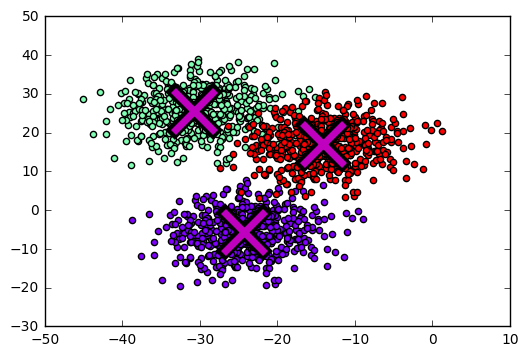

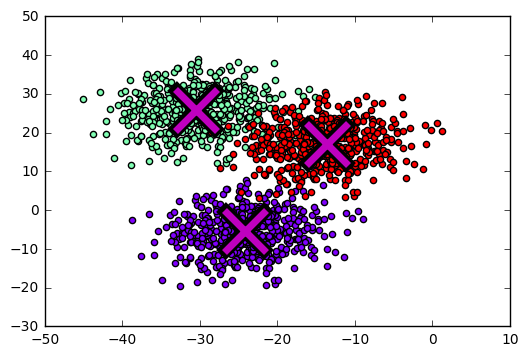

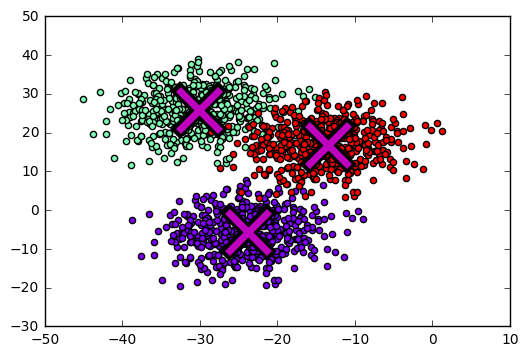

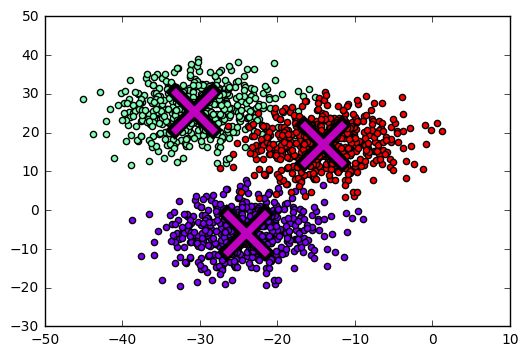

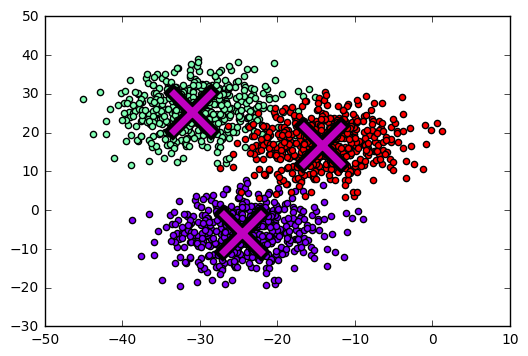

In [90]:
#EXECUTION:

initial_centroids = choose_random_centroids(samples, n_clusters)
nearest_indices_first = assign_to_nearest(samples, initial_centroids)

nearest_indices_loop = assign_to_nearest(samples, new_centroids)
new_centroids = update_centroids(samples, nearest_indices_loop, n_clusters)


#generate the samples
model = tf.global_variables_initializer()
with tf.Session() as session:
    sample_values = session.run(samples)
    centroid_values = session.run(centroids)
    
    #once
    initial_values = session.run(initial_centroids)

    #until diff below some threshold
    for i in range(50):
        updated_centroids_values = session.run(new_centroids)
        nearest_indices_values = session.run(nearest_indices_loop)
        
        #plot every 10 iterations
        if (i%10) == 0:
            plot_clusters(sample_values, updated_centroids_values, n_samples_per_cluster)
            

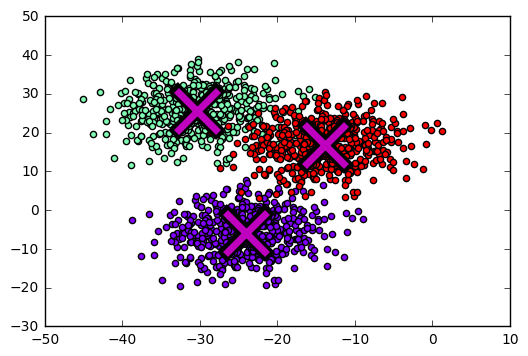

In [91]:
#plotting real distributions
plot_clusters(sample_values, centroid_values, n_samples_per_cluster)